In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import LinRegAC.utilsAC as utilsAC
import LinRegAC.linRegAC as linRegAC
import LinRegAC.crossValdAC as crossValdAC

In [2]:
CH_dataCols = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
CHdata = pd.read_csv('computer_hardware/machine.data', names=CH_dataCols)
CHdata

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
CHdata_x = CHdata[CHdata.columns[2:-2]]
CHdata_y = CHdata[CHdata.columns[-2]]

In [4]:
train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(CHdata_x, CHdata_y, 0.8)

In [5]:
train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

In [6]:
linReg1 = linRegAC.LinReg(mode=1)
linReg1.fit(train_x, train_y)
pred1 = linReg1.predict(test_x)
print(f'MSE: {utilsAC.getMse(test_y, pred1)}, RMSE: {utilsAC.getRmse(test_y, pred1)}')

Fitting completed.
Mode = 1, using Normal equation w = (X^T X)^-1 X^T y

MSE: 10365.762999598668, RMSE: 101.81239118888558


In [7]:
lrs = [0.01, 0.005, 0.003, 0.001]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'violet', 'purple']

In [8]:
hld_cv = crossValdAC.CrossVald(option='holdout')
gd_hld_train_costs, gd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 59.3243
Iteration  200 | Loss = 58.8231
Iteration  300 | Loss = 58.7857
Iteration  400 | Loss = 58.7820
Iteration  500 | Loss = 58.7815
Iteration  600 | Loss = 58.7815
Iteration  700 | Loss = 58.7814
Iteration  800 | Loss = 58.7814
Iteration  900 | Loss = 58.7814
Iteration 1000 | Loss = 58.7814
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4928.079271490233, RMSE: 70.20027971091164
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 65.2055
Iteration  200 | Loss = 62.6828
Iteration  300 | Loss = 61.9536
Iteration  400 | Loss = 61.6202
Iteration  500 | Loss = 61.4358
Iteration  600 | Loss = 61.3267
Iteration  700 | Loss = 61.2606
Iteration  800 | Loss = 61.2202
Iteration  900 | Loss = 61.1954
Iteration 1000 | Loss = 61.1802
Fitting 

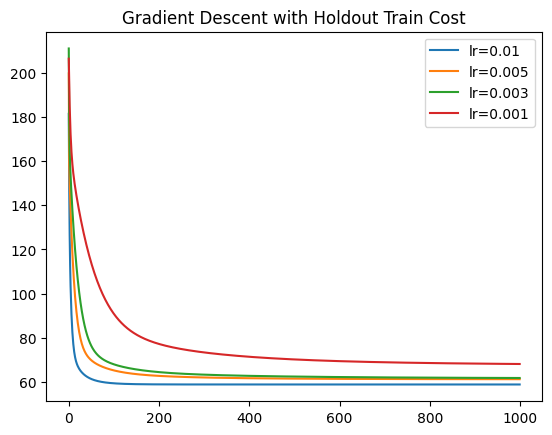

In [9]:
for i in range(len(gd_hld_train_costs)):
    plt.plot(gd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Gradient Descent with Holdout Train Cost')
plt.show()

In [10]:
print(gd_hld_opt_model)

{'rmse': 34.45562853953312, 'lr': 0.001}


In [11]:
sgd_hld_train_costs, sgd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 63.0241
Iteration  200 | Loss = 62.4687
Iteration  300 | Loss = 62.3740
Iteration  400 | Loss = 62.3470
Iteration  500 | Loss = 62.3392
Iteration  600 | Loss = 62.3373
Iteration  700 | Loss = 62.3370
Iteration  800 | Loss = 62.3372
Iteration  900 | Loss = 62.3373
Iteration 1000 | Loss = 62.3374
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2907.5324586434895, RMSE: 53.92153983932107
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 57.4153
Iteration  200 | Loss = 55.2125
Iteration  300 | Loss = 54.5571
Iteration  400 | Loss = 54.2335
Iteration  500 | Loss = 54.0523
Iteration  600 | Loss = 53.9480
Iteration  700 | Loss = 53.8874
Iteration  800 | Loss = 53.8523
Iteration  900 | Loss = 53.8319
Iteration 1000 | Loss = 53.82

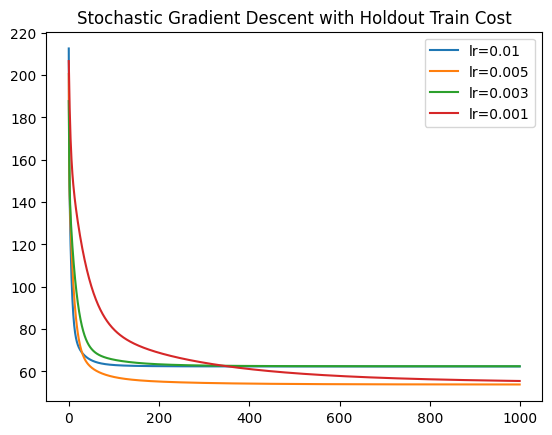

In [12]:
for i in range(len(sgd_hld_train_costs)):
    plt.plot(sgd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Stochastic Gradient Descent with Holdout Train Cost')
plt.show()

In [13]:
print(sgd_hld_opt_model)

{'rmse': 51.905564963108205, 'lr': 0.003}


In [14]:
montc_cv = crossValdAC.CrossVald(option='monte_carlo', monte_carlo=5)
gd_montc_train_costs, gd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 42.8189
Iteration  200 | Loss = 42.6538
Iteration  300 | Loss = 42.6300
Iteration  400 | Loss = 42.6260
Iteration  500 | Loss = 42.6253
Iteration  600 | Loss = 42.6252
Iteration  700 | Loss = 42.6251
Iteration  800 | Loss = 42.6251
Iteration  900 | Loss = 42.6251
Iteration 1000 | Loss = 42.6251
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 13864.889021505236, RMSE: 117.74926335865221
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 54.9859
Iteration  200 | Loss = 52.7910
Iteration  300 | Loss = 52.0551
Iteration  400 | Loss = 51.7848
Iteration  500 | Loss = 51.6842
Iteration  600 | Loss = 51.6468
Iteration  700 | Loss = 51.6328
Iteration  800 | Loss = 51.6276
Iteration  900 | Loss = 51.6257
Iteration 1000 | Loss = 51.6250
Fit

In [15]:
print(gd_montc_opt_model)

{'rmse': 78.39291858791282, 'lr': 0.005}


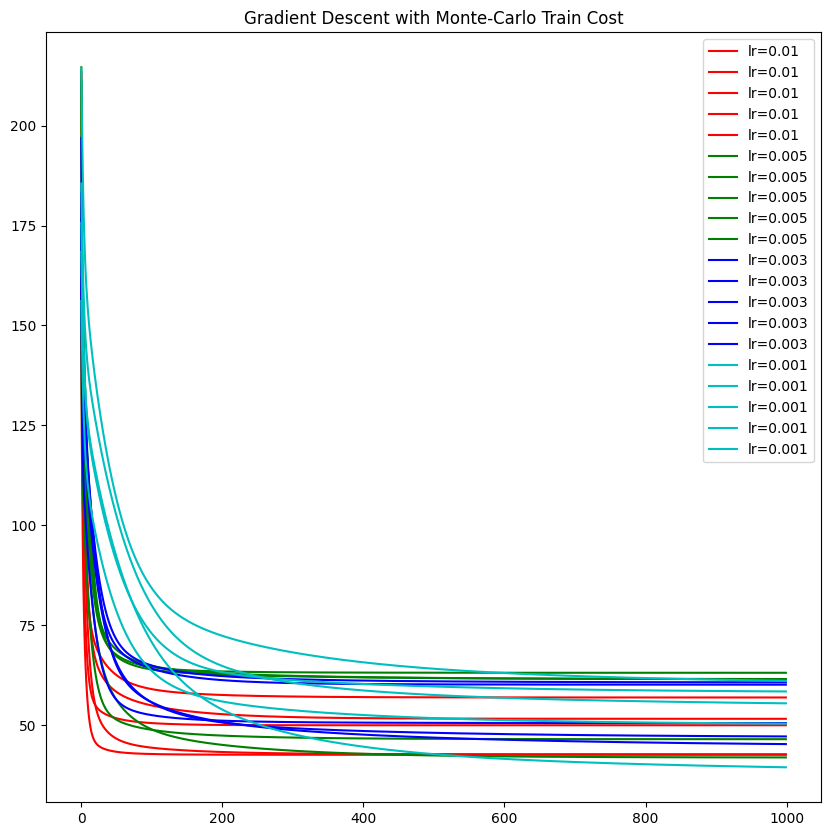

In [16]:
plt.figure(figsize=(10, 10))
for i in range(len(gd_montc_train_costs)):
    for j in range(len(gd_montc_train_costs[i])):
        plt.plot(gd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with Monte-Carlo Train Cost')
plt.show()

In [17]:
sgd_montc_train_costs, sgd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 61.8683
Iteration  200 | Loss = 61.1359
Iteration  300 | Loss = 60.9650
Iteration  400 | Loss = 60.9099
Iteration  500 | Loss = 60.8905
Iteration  600 | Loss = 60.8836
Iteration  700 | Loss = 60.8812
Iteration  800 | Loss = 60.8805
Iteration  900 | Loss = 60.8802
Iteration 1000 | Loss = 60.8802
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3048.2025453095694, RMSE: 55.21052929749514
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 62.5922
Iteration  200 | Loss = 62.2160
Iteration  300 | Loss = 62.1882
Iteration  400 | Loss = 62.1879
Iteration  500 | Loss = 62.1889
Iteration  600 | Loss = 62.1893
Iteration  700 | Loss = 62.1895
Iteration  800 | Loss = 62.1895
Iteration  900 | Loss = 62.1895
Iteration 1000 | Loss = 62

In [18]:
print(sgd_montc_opt_model)

{'rmse': 60.33451156715948, 'lr': 0.001}


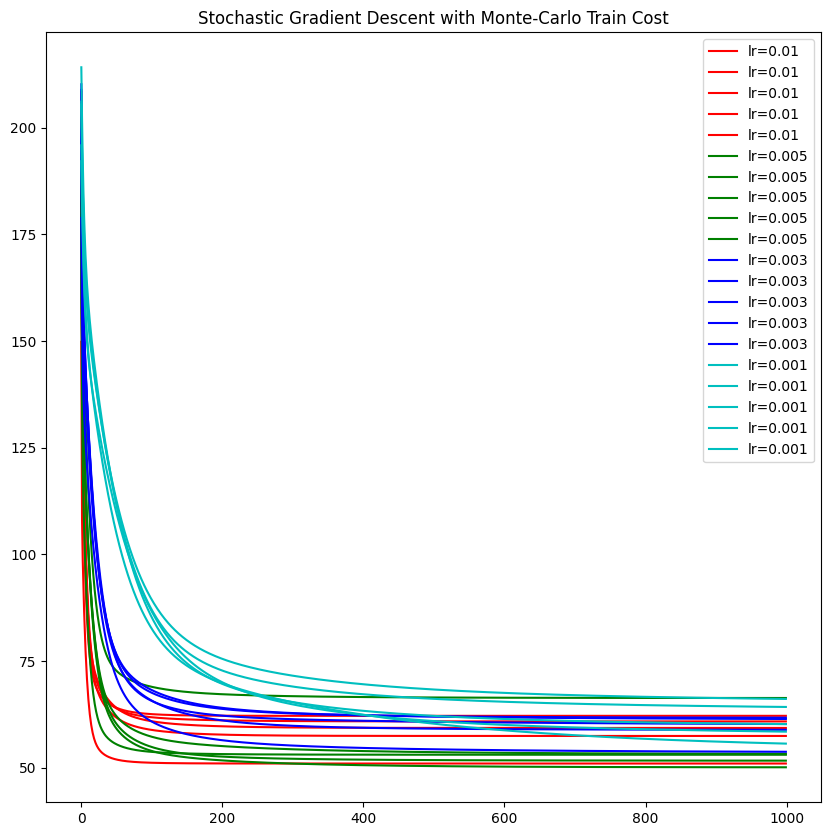

In [19]:
plt.figure(figsize=(10, 10))
for i in range(len(sgd_montc_train_costs)):
    for j in range(len(sgd_montc_train_costs[i])):
        plt.plot(sgd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with Monte-Carlo Train Cost')
plt.show()

In [20]:
kfold_cv = crossValdAC.CrossVald(option='k_fold', k_fold=6)
gd_kfold_train_costs, gd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 55.4883
Iteration  200 | Loss = 54.4676
Iteration  300 | Loss = 54.2449
Iteration  400 | Loss = 54.1861
Iteration  500 | Loss = 54.1702
Iteration  600 | Loss = 54.1659
Iteration  700 | Loss = 54.1647
Iteration  800 | Loss = 54.1644
Iteration  900 | Loss = 54.1643
Iteration 1000 | Loss = 54.1642
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 7390.673534880303, RMSE: [85.96902660191229]
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 60.7381
Iteration  200 | Loss = 60.5723
Iteration  300 | Loss = 60.5645
Iteration  400 | Loss = 60.5641
Iteration  500 | Loss = 60.5640
Iteration  600 | Loss = 60.5640
Iteration  700 | Loss = 60.5640
Iteration  800 | Loss = 60.5640
Iteration  900 | Loss = 60.5640
Iteration 1000 | Loss = 60.5640
Fitting 

In [21]:
print(gd_kfold_opt_model)

{'rmse': 65.34580374030192, 'lr': 0.005}


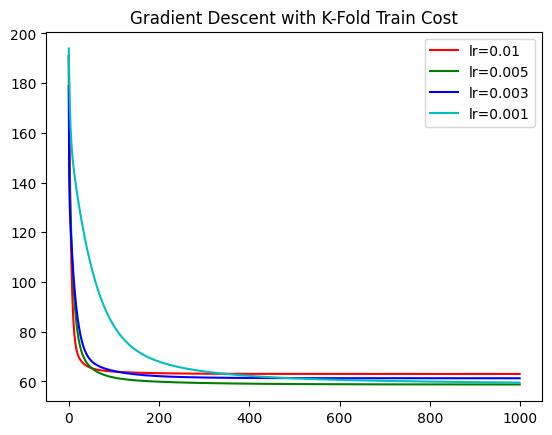

In [22]:
for i in range(len(gd_kfold_train_costs)):
    plt.plot(gd_kfold_train_costs[i], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with K-Fold Train Cost')
plt.show()

In [23]:
sgd_kfold_train_costs, sgd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 57.1944
Iteration  200 | Loss = 56.8628
Iteration  300 | Loss = 56.8539
Iteration  400 | Loss = 56.8606
Iteration  500 | Loss = 56.8639
Iteration  600 | Loss = 56.8652
Iteration  700 | Loss = 56.8656
Iteration  800 | Loss = 56.8657
Iteration  900 | Loss = 56.8658
Iteration 1000 | Loss = 56.8658
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 7082.961100856606, RMSE: [84.16032973353067]
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 62.5167
Iteration  200 | Loss = 61.7116
Iteration  300 | Loss = 61.4936
Iteration  400 | Loss = 61.4246
Iteration  500 | Loss = 61.4017
Iteration  600 | Loss = 61.3937
Iteration  700 | Loss = 61.3907
Iteration  800 | Loss = 61.3894
Iteration  900 | Loss = 61.3889
Iteration 1000 | Loss = 61.388

In [24]:
print(sgd_kfold_opt_model)

{'rmse': 61.246064454533666, 'lr': 0.003}


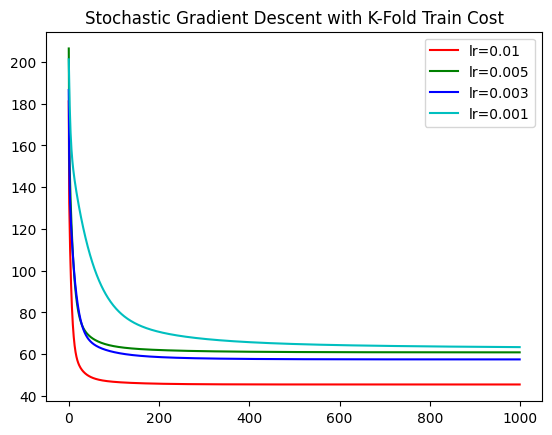

In [25]:
for i in range(len(sgd_kfold_train_costs)):
    plt.plot(sgd_kfold_train_costs[i], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with K-Fold Train Cost')
plt.show()